<a href="https://colab.research.google.com/github/akshaypat444/tensorflow_practice/blob/main/HouseingPrice_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [49]:
(x_train, y_train), (x_test, y_test)  = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

In [50]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

# Model 1 - Without pre-processing

In [87]:
tf.random.set_seed(42)

# Create a Model
boston_regression_model = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a Model
boston_regression_model.compile(loss=tf.keras.losses.mae,
                                optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
                                metrics=["mae"])

# Fit a model
boston_regression_model_hist = boston_regression_model.fit(x_train, y_train, epochs=150)

Epoch 1/150
13/13 [==============================] - 1s 8ms/step - loss: 61.7529 - mae: 61.7529
Epoch 2/150
13/13 [==============================] - 0s 3ms/step - loss: 55.3145 - mae: 55.3145
Epoch 3/150
13/13 [==============================] - 0s 3ms/step - loss: 45.3927 - mae: 45.3927
Epoch 4/150
13/13 [==============================] - 0s 3ms/step - loss: 40.9839 - mae: 40.9839
Epoch 5/150
13/13 [==============================] - 0s 3ms/step - loss: 33.3632 - mae: 33.3632
Epoch 6/150
13/13 [==============================] - 0s 3ms/step - loss: 30.3255 - mae: 30.3255
Epoch 7/150
13/13 [==============================] - 0s 4ms/step - loss: 25.4855 - mae: 25.4855
Epoch 8/150
13/13 [==============================] - 0s 2ms/step - loss: 23.9401 - mae: 23.9401
Epoch 9/150
13/13 [==============================] - 0s 2ms/step - loss: 19.4510 - mae: 19.4510
Epoch 10/150
13/13 [==============================] - 0s 2ms/step - loss: 18.4416 - mae: 18.4416
Epoch 11/150
13/13 [===================

## Summarize the model

In [52]:
boston_regression_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 20)                280       
                                                                 
 dense_41 (Dense)            (None, 10)                210       
                                                                 
 dense_42 (Dense)            (None, 1)                 11        
                                                                 
Total params: 501 (1.96 KB)
Trainable params: 501 (1.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Visualize the model training

Text(0.5, 0, 'epochs')

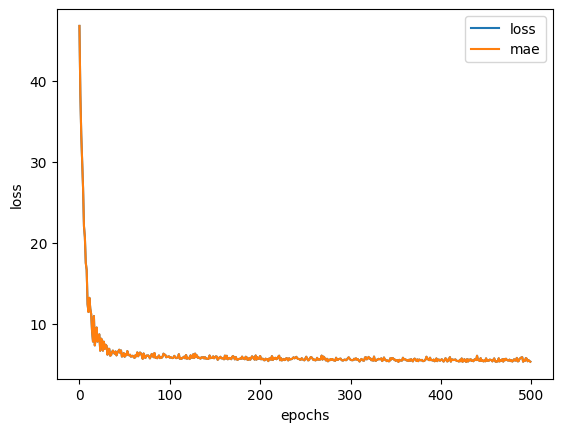

In [84]:
pd.DataFrame(boston_regression_model_hist.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Evaluate the model

In [80]:
y_pred = boston_regression_model.predict(x_test)

4/4 [==============================] - 0s 4ms/step


In [85]:
boston_regression_model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 5.8236 - mae: 5.8236


[5.823605537414551, 5.823605537414551]

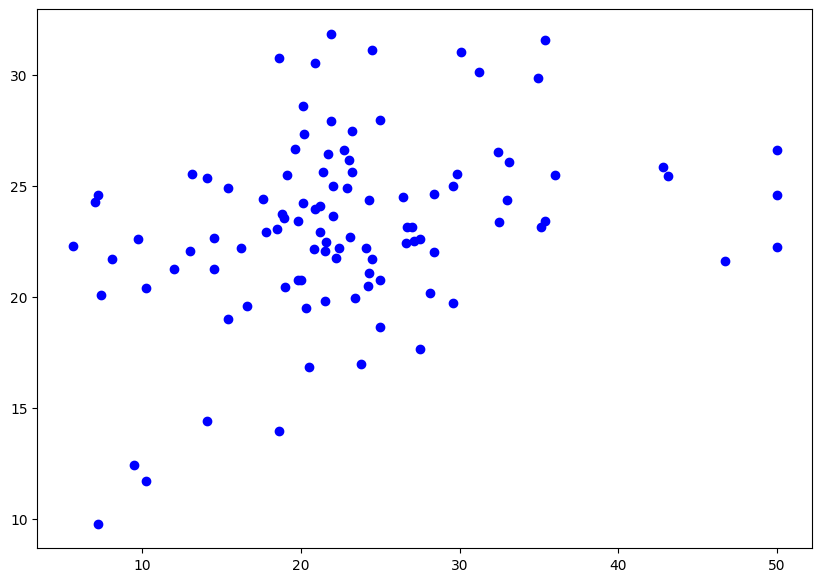

In [86]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, c="b", label="training data")

# Model 2 - Without preprocessing

1. Using Adam Optimizer

In [108]:
tf.random.set_seed(42)

# Create a Model
boston_regression_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(15),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a Model
boston_regression_model_2.compile(loss=tf.keras.losses.mae,
                                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                                metrics=["mae"])

# Fit a model
boston_regression_model_hist_2 = boston_regression_model_2.fit(x_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 71.2896 - mae: 71.2896
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 22.6396 - mae: 22.6396
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 14.5127 - mae: 14.5127
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 8.5409 - mae: 8.5409
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 6.7341 - mae: 6.7341
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 6.1590 - mae: 6.1590
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 6.1734 - mae: 6.1734
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 6.4704 - mae: 6.4704
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 6.0883 - mae: 6.0883
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 7.9230 - mae: 7.9230
Epoch 11/100
13/13 [==============================] -

In [116]:
boston_regression_model_2.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 4.2785 - mae: 4.2785


[4.278454780578613, 4.278454780578613]

## Learning Notes


1.   Adam optimizer converges faster i.e. less number of epochs and less faster earning speed
2.   The loss doesn't seem to improve much with tuning or changing of optimizers but efficiency in training changes
3. Further going to try to train both models with normalized data

## Normalize the data and preprocess

In [100]:
from sklearn import preprocessing

X_train_normal = preprocessing.normalize(x_train)
X_test_normal = preprocessing.normalize(x_test)

In [105]:
X_train_normal.shape, x_train.shape

((404, 13), (404, 13))

## Model 3 -
1. Using model 2 as a baseline I will train the model again to see if loss reduces.


In [135]:
tf.random.set_seed(42)


# Create a Model
boston_regression_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(15),
    tf.keras.layers.Dense(7),
    tf.keras.layers.Dense(1)
])

# Compile a Model
boston_regression_model_3.compile(loss=tf.keras.losses.mae,
                                optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
                                metrics=["mae"])

# Fit a model
boston_regression_model_hist_3 = boston_regression_model_3.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 14.4669 - mae: 14.4669
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 7.4301 - mae: 7.4301
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 5.6883 - mae: 5.6883
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 5.3102 - mae: 5.3102
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 5.1417 - mae: 5.1417
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 5.0110 - mae: 5.0110
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 5.0013 - mae: 5.0013
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 4.9598 - mae: 4.9598
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 5.1013 - mae: 5.1013
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 5.1079 - mae: 5.1079
Epoch 11/100
13/13 [==============================] - 0s 

In [136]:
boston_regression_model_3.evaluate(X_test_normal, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 3.6682 - mae: 3.6682


[3.668219566345215, 3.668219566345215]

4/4 [==============================] - 0s 3ms/step


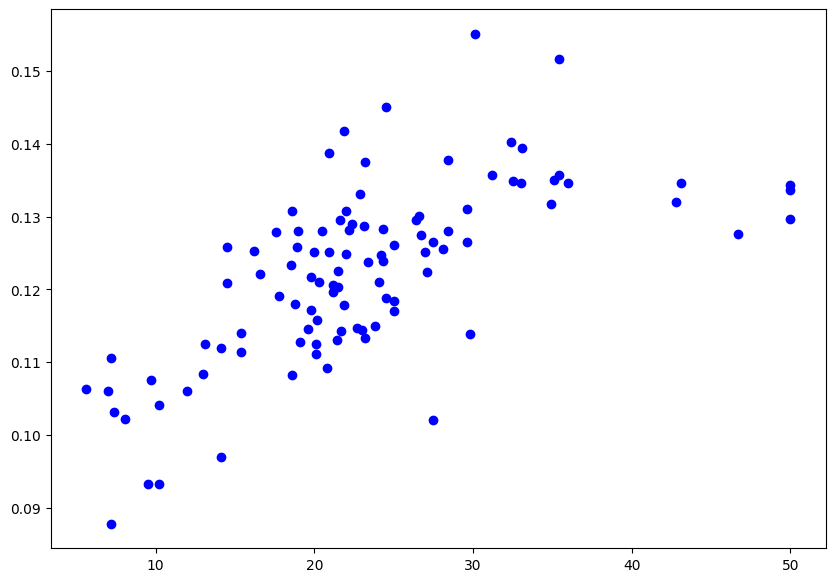

In [137]:
y_pred_3 = boston_regression_model.predict(X_test_normal)

plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred_3, c="b", label="training data")

## TAKEAWAY ##

1. Normalizing the data in boston housing price regression problem didn't helped that much to improve the accuracy of the model.
2. Initial loss in models 1 & 2 was bigger as compared to model 3, that also proves normalized models learns and converges faster.